In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/kc_house_data.csv")

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

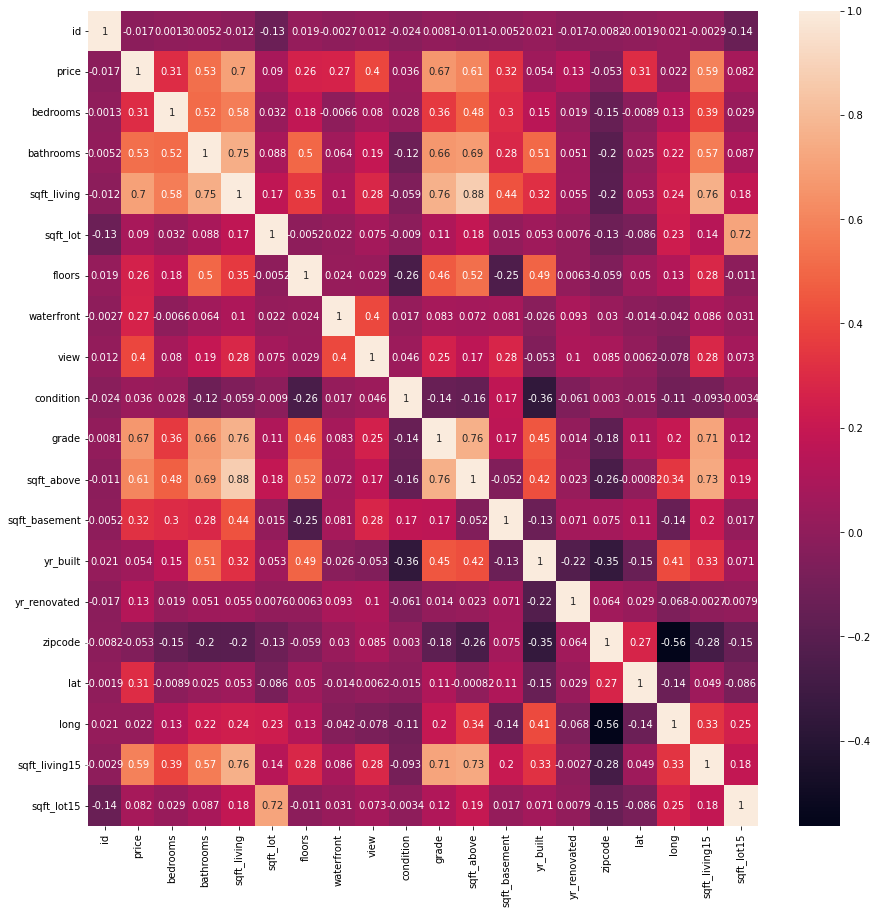

In [5]:
plt.figure(figsize=(15, 15))
plt.subplot(1,1,1)
sns.heatmap(df.corr(), annot=True)

In [6]:
#shd drop sqft_lot15,long,zipcode,yr_built,condition,sqft_lot due to the less colrelation and date and view since most value is 0
df=df.drop(["sqft_lot15","date","long","zipcode","lat","waterfront","floors","bedrooms","view","sqft_basement","yr_built","condition","sqft_lot","id","yr_renovated"],axis=1)

In [7]:
y=df["price"]
x=df.drop(["price"],axis=1)

In [17]:
print(y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [8]:
# Select ratio
ratio = 0.80
 
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
x_train = x[0:train_size]
y_train=y[0:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

In [20]:
#x1=x_train["bathrooms"]
#x2=x_train["sqft_living"]
#x3=x_train["grade"]
#x4=x_train["sqft_above"]
#x5=x_train["sqft_living15"]
x2=x_train["grade"]
x1=x_train["sqft_living"]


In [11]:
length=0 
total=0
for i in y_train: 
  length+=1
  total=total+i
m_y=total/length
t_y=total
length=0 
total=0
for i in x1: 
  length+=1
  total=total+i
m_x1=total/length
t_x1=total
length=0 
total=0
for i in x2: 
  length+=1
  total=total+i
m_x2=total/length
t_x2=total
length=0 
total=0

print(m_x1,m_x2)

2054.0354540196645 7.59491035280509


In [46]:
x2s2=x2*x2
x1y1=x1*y_train
x1x2=x1*x2
x2y2=x2*y_train
x1s2=x1*x1
x1x2s2=(x1*x2)*(x1*x2)

In [47]:
def summing(grades):   #list is passed to the function
    sum =float(0)  
    for n in grades:
        sum += n
    print(sum)

In [48]:
sx2s2=summing(x2s2)
sx1y=summing(x1y)
sx1x2=summing(x1x2)
sx2y=summing(x2y2)
sx1s2=summing(x1s2)
sx1x2s2=summing(x1x2s2)

1020972.0
22950061564360.0
283771635.0
74934103894.0
87080677137.0
6409414143559.0


In [ ]:
x1x2s2.dtype

dtype('int64')